# Project: MNIST set - handwriting recognition
#### Tim Kroehler, 2019

## Introduction
##### As a pass this rite of initiation to ML, there is nothing much remarkable about this code. 
#### We use some CNN layers as all good image classifiers should do


In [36]:
# import the libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [37]:
# load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# CNNs require 4d ndarrays so we must reshape it
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# and normalize it between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# and change the label to one-hot array
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [38]:
# heres the layers
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='softmax'))
model.add(Dropout(0.50))
model.add(Dense(10, activation='softmax'))

In [39]:
# and we're off...
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
batch_size = 128
num_epochs = 10
hist = model.fit(X_train, y_train_one_hot, batch_size=batch_size, validation_data=(X_test, y_test_one_hot), epochs=num_epochs, verbose=1)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 144s 2ms/step - loss: 1.8728 - accuracy: 0.4646 - val_loss: 1.5104 - val_accuracy: 0.8806
Epoch 2/10
60000/60000 [==============================] - 135s 2ms/step - loss: 1.4618 - accuracy: 0.5345 - val_loss: 1.0657 - val_accuracy: 0.9762
Epoch 3/10
60000/60000 [==============================] - 136s 2ms/step - loss: 1.3067 - accuracy: 0.5423 - val_loss: 0.8310 - val_accuracy: 0.9818
Epoch 4/10
60000/60000 [==============================] - 142s 2ms/step - loss: 1.2444 - accuracy: 0.5486 - val_loss: 0.6869 - val_accuracy: 0.9838
Epoch 5/10
60000/60000 [==============================] - 143s 2ms/step - loss: 1.2146 - accuracy: 0.5501 - val_loss: 0.5883 - val_accuracy: 0.9844
Epoch 6/10
60000/60000 [==============================] - 149s 2ms/step - loss: 1.1974 - accuracy: 0.5518 - val_loss: 0.5125 - val_accuracy: 0.9861
Epoch 7/10
60000/60000 [==============================] - 148s

Test loss: 0.3280764681339264
Test accuracy: 0.9882000088691711


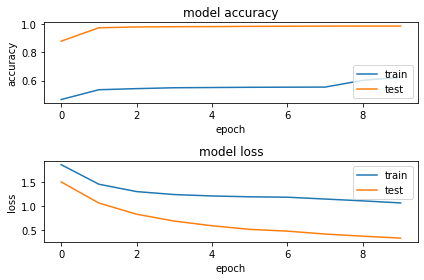

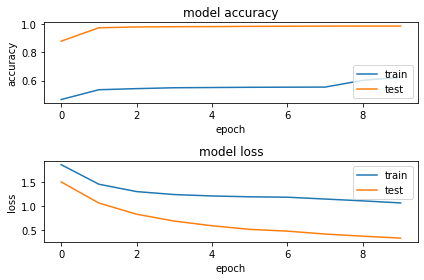

In [50]:
score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 
# Test loss: 0.3280764681339264
# Test accuracy: 0.9882000088691711

import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig


